In [1]:
# Parámetros base de la simulación
inversion_inicial = 10000       # Monto de inversión inicial en dólares
media_retorno_anual = 0.07      # Retorno promedio anual esperado (7%)
volatilidad_anual = 0.15        # Volatilidad anual esperada (15%)
anios = 10                      # Horizonte de inversión (años)
simulaciones = 10000            # Número de simulaciones Monte Carlo


In [3]:
import numpy as np

# Semilla para reproducibilidad
np.random.seed(42)

# Arreglo para guardar el valor final de cada simulación
resultados = np.zeros(simulaciones)

# Bucle de simulación
for i in range(simulaciones):
    valor = inversion_inicial
    for _ in range(anios):
        retorno_anual = np.random.normal(media_retorno_anual, volatilidad_anual)
        valor *= (1 + retorno_anual)
    resultados[i] = valor


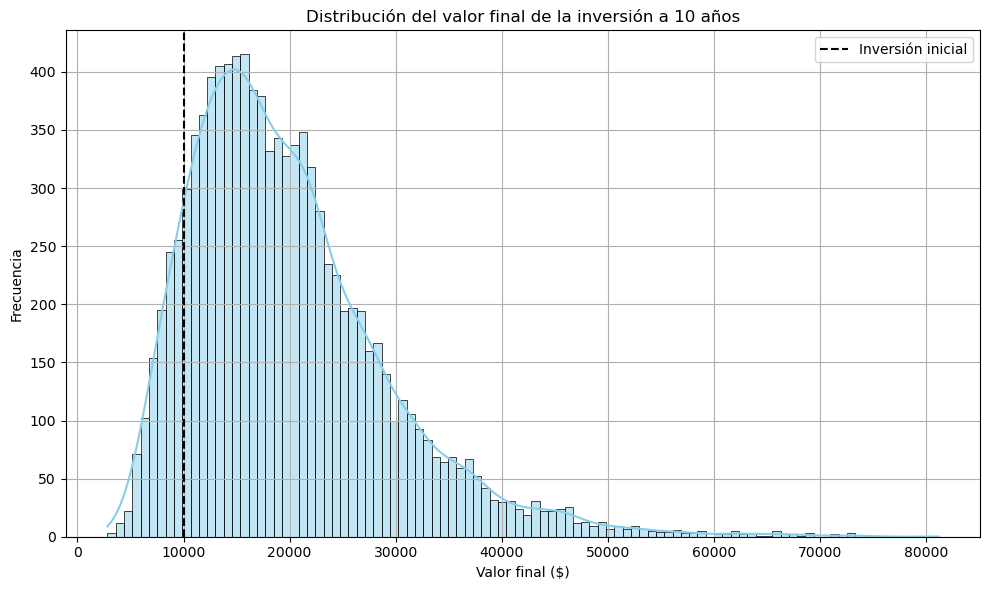

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual
plt.figure(figsize=(10, 6))
sns.histplot(resultados, bins=100, kde=True, color='skyblue')

# Líneas de referencia
plt.axvline(inversion_inicial, color='black', linestyle='--', label='Inversión inicial')

# Título y etiquetas
plt.title("Distribución del valor final de la inversión a 10 años")
plt.xlabel("Valor final ($)")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


In [7]:
# Valor esperado (promedio de todas las simulaciones)
valor_esperado = np.mean(resultados)

# Mediana (valor central)
mediana = np.median(resultados)

# Percentiles (valor en riesgo al 5% y 95%)
percentil_5 = np.percentile(resultados, 5)
percentil_95 = np.percentile(resultados, 95)

# Probabilidad de pérdida (valor final < inversión inicial)
probabilidad_perdida = np.mean(resultados < inversion_inicial) * 100

# Probabilidad de duplicar inversión
probabilidad_duplicar = np.mean(resultados > 2 * inversion_inicial) * 100

# Mostrar resultados
print(f"Valor esperado: ${valor_esperado:,.2f}")
print(f"Mediana: ${mediana:,.2f}")
print(f"Percentil 5 (VaR): ${percentil_5:,.2f}")
print(f"Percentil 95: ${percentil_95:,.2f}")
print(f"Probabilidad de pérdida: {probabilidad_perdida:.2f}%")
print(f"Probabilidad de duplicar inversión: {probabilidad_duplicar:.2f}%")


Valor esperado: $19,773.93
Mediana: $18,000.95
Percentil 5 (VaR): $8,086.16
Percentil 95: $37,443.44
Probabilidad de pérdida: 11.03%
Probabilidad de duplicar inversión: 41.55%


In [11]:
# Definir las carteras
carteras = {
    "Conservadora": {"media": 0.05, "vol": 0.08},
    "Agresiva": {"media": 0.09, "vol": 0.25}
}

# Simular cada cartera
resultados_comparacion = {}

for nombre, params in carteras.items():
    simulacion = np.zeros(simulaciones)
    for i in range(simulaciones):
        valor = inversion_inicial
        for _ in range(anios):
            retorno_anual = np.random.normal(params["media"], params["vol"])
            valor *= (1 + retorno_anual)
        simulacion[i] = valor
    resultados_comparacion[nombre] = simulacion


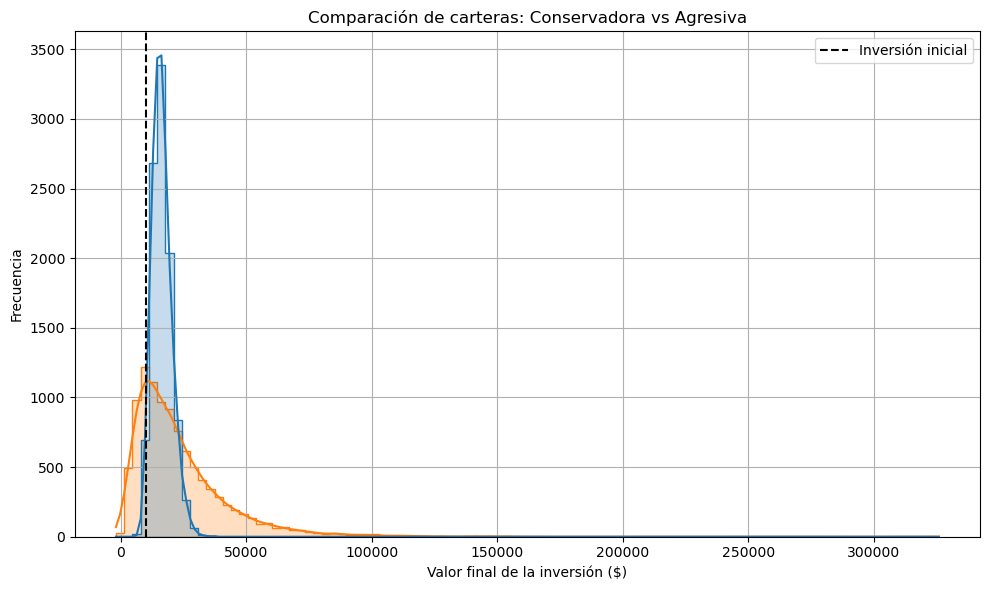

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convertimos los resultados a DataFrames
df_conservadora = pd.DataFrame(resultados_comparacion["Conservadora"], columns=["Valor_Final"])
df_conservadora["Cartera"] = "Conservadora"

df_agresiva = pd.DataFrame(resultados_comparacion["Agresiva"], columns=["Valor_Final"])
df_agresiva["Cartera"] = "Agresiva"

# Unimos ambos en uno solo
df_comparado = pd.concat([df_conservadora, df_agresiva], ignore_index=True)

# Graficamos
plt.figure(figsize=(10, 6))
sns.histplot(data=df_comparado, x="Valor_Final", hue="Cartera", kde=True, bins=100, element="step")
plt.axvline(inversion_inicial, color='black', linestyle='--', label='Inversión inicial')

plt.title("Comparación de carteras: Conservadora vs Agresiva")
plt.xlabel("Valor final de la inversión ($)")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
def calcular_metricas(resultados, nombre_cartera):
    valor_esperado = np.mean(resultados)
    mediana = np.median(resultados)
    p5 = np.percentile(resultados, 5)
    p95 = np.percentile(resultados, 95)
    prob_perdida = np.mean(resultados < inversion_inicial) * 100
    prob_duplicar = np.mean(resultados > 2 * inversion_inicial) * 100

    print(f"\nMétricas para cartera {nombre_cartera}:")
    print(f"Valor esperado: ${valor_esperado:,.2f}")
    print(f"Mediana: ${mediana:,.2f}")
    print(f"Percentil 5 (Valor en Riesgo): ${p5:,.2f}")
    print(f"Percentil 95: ${p95:,.2f}")
    print(f"Probabilidad de pérdida: {prob_perdida:.2f}%")
    print(f"Probabilidad de duplicar inversión: {prob_duplicar:.2f}%")

# Ejecutar para ambas carteras
calcular_metricas(resultados_comparacion["Conservadora"], "Conservadora")
calcular_metricas(resultados_comparacion["Agresiva"], "Agresiva")



Métricas para cartera Conservadora:
Valor esperado: $16,267.39
Mediana: $15,870.25
Percentil 5 (Valor en Riesgo): $10,587.37
Percentil 95: $23,295.75
Probabilidad de pérdida: 2.87%
Probabilidad de duplicar inversión: 16.35%

Métricas para cartera Agresiva:
Valor esperado: $23,287.40
Mediana: $18,362.12
Percentil 5 (Valor en Riesgo): $4,475.68
Percentil 95: $59,043.75
Probabilidad de pérdida: 23.18%
Probabilidad de duplicar inversión: 45.49%
